In [1]:
from BValg import *
from QEC import *

In [2]:
alg=BVAlgorithm_qiskit(3)

In [3]:
a=0b11
b=0

In [4]:
alg.set_input([a,b])
alg.construct_circuit()
alg.compute_result()

The function is f(x)=11x+0


In [5]:
circ=alg.circuit

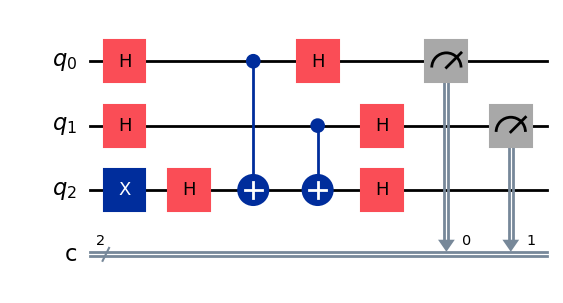

In [6]:
circ.draw("mpl")

In [7]:
from noise import *

#Initialize a repetiton 
rep=bitfliprepetitioncode(3)
#We can add a noise model to the QECcode class 
noisemodel=construct_bitflip_noise_model(0.01,0.01,0.01)
rep.construct_syndrome_table()
rep.show_syndrome_table()    
rep.add_noise_model(noisemodel)

The syndrome table is:
III->00
IIX->01
IXI->11
XII->10
The error table is:
00->III
01->IIX
11->IXI
10->XII


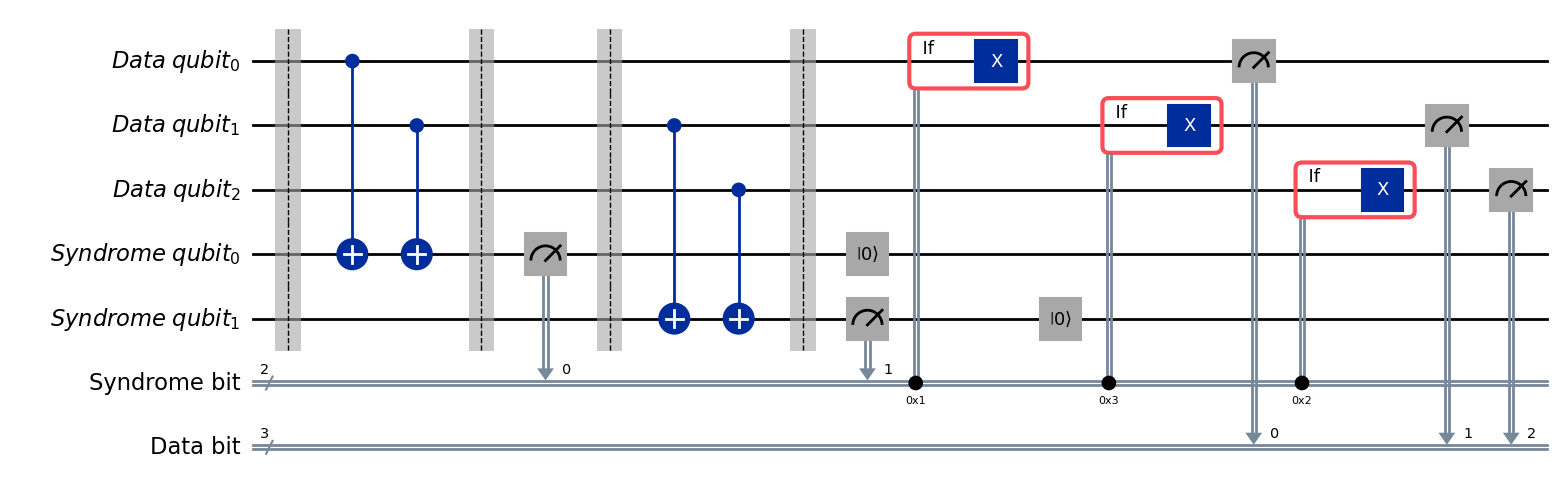

In [8]:
rep.construct_circuit()
rep._circuit.draw("mpl")

In [9]:
four=fourqubitcode()
four.construct_syndrome_table()
four.show_syndrome_table()  

Error: 01->IIXI is not unique
Error: 00->IIXX is not unique
Error: 10->IIZI is not unique
Error: 11->IIZX is not unique
Error: 00->IIZZ is not unique
Error: 01->IXII is not unique
Error: 00->IXIX is not unique
Error: 11->IXIZ is not unique
Error: 00->IXXI is not unique
Error: 11->IXZI is not unique
Error: 10->IZII is not unique
Error: 11->IZIX is not unique
Error: 00->IZIZ is not unique
Error: 11->IZXI is not unique
Error: 00->IZZI is not unique
Error: 01->XIII is not unique
Error: 00->XIIX is not unique
Error: 11->XIIZ is not unique
Error: 00->XIXI is not unique
Error: 11->XIZI is not unique
Error: 00->XXII is not unique
Error: 11->XZII is not unique
Error: 10->ZIII is not unique
Error: 11->ZIIX is not unique
Error: 00->ZIIZ is not unique
Error: 11->ZIXI is not unique
Error: 00->ZIZI is not unique
Error: 11->ZXII is not unique
Error: 00->ZZII is not unique
The syndrome table is:
IIII->00
IIIX->01
IIIZ->10
IIXI->01
IIXX->00
IIXZ->11
IIZI->10
IIZX->11
IIZZ->00
IXII->01
IXIX->00
IXIZ->11

In [10]:
four.construct_circuit()

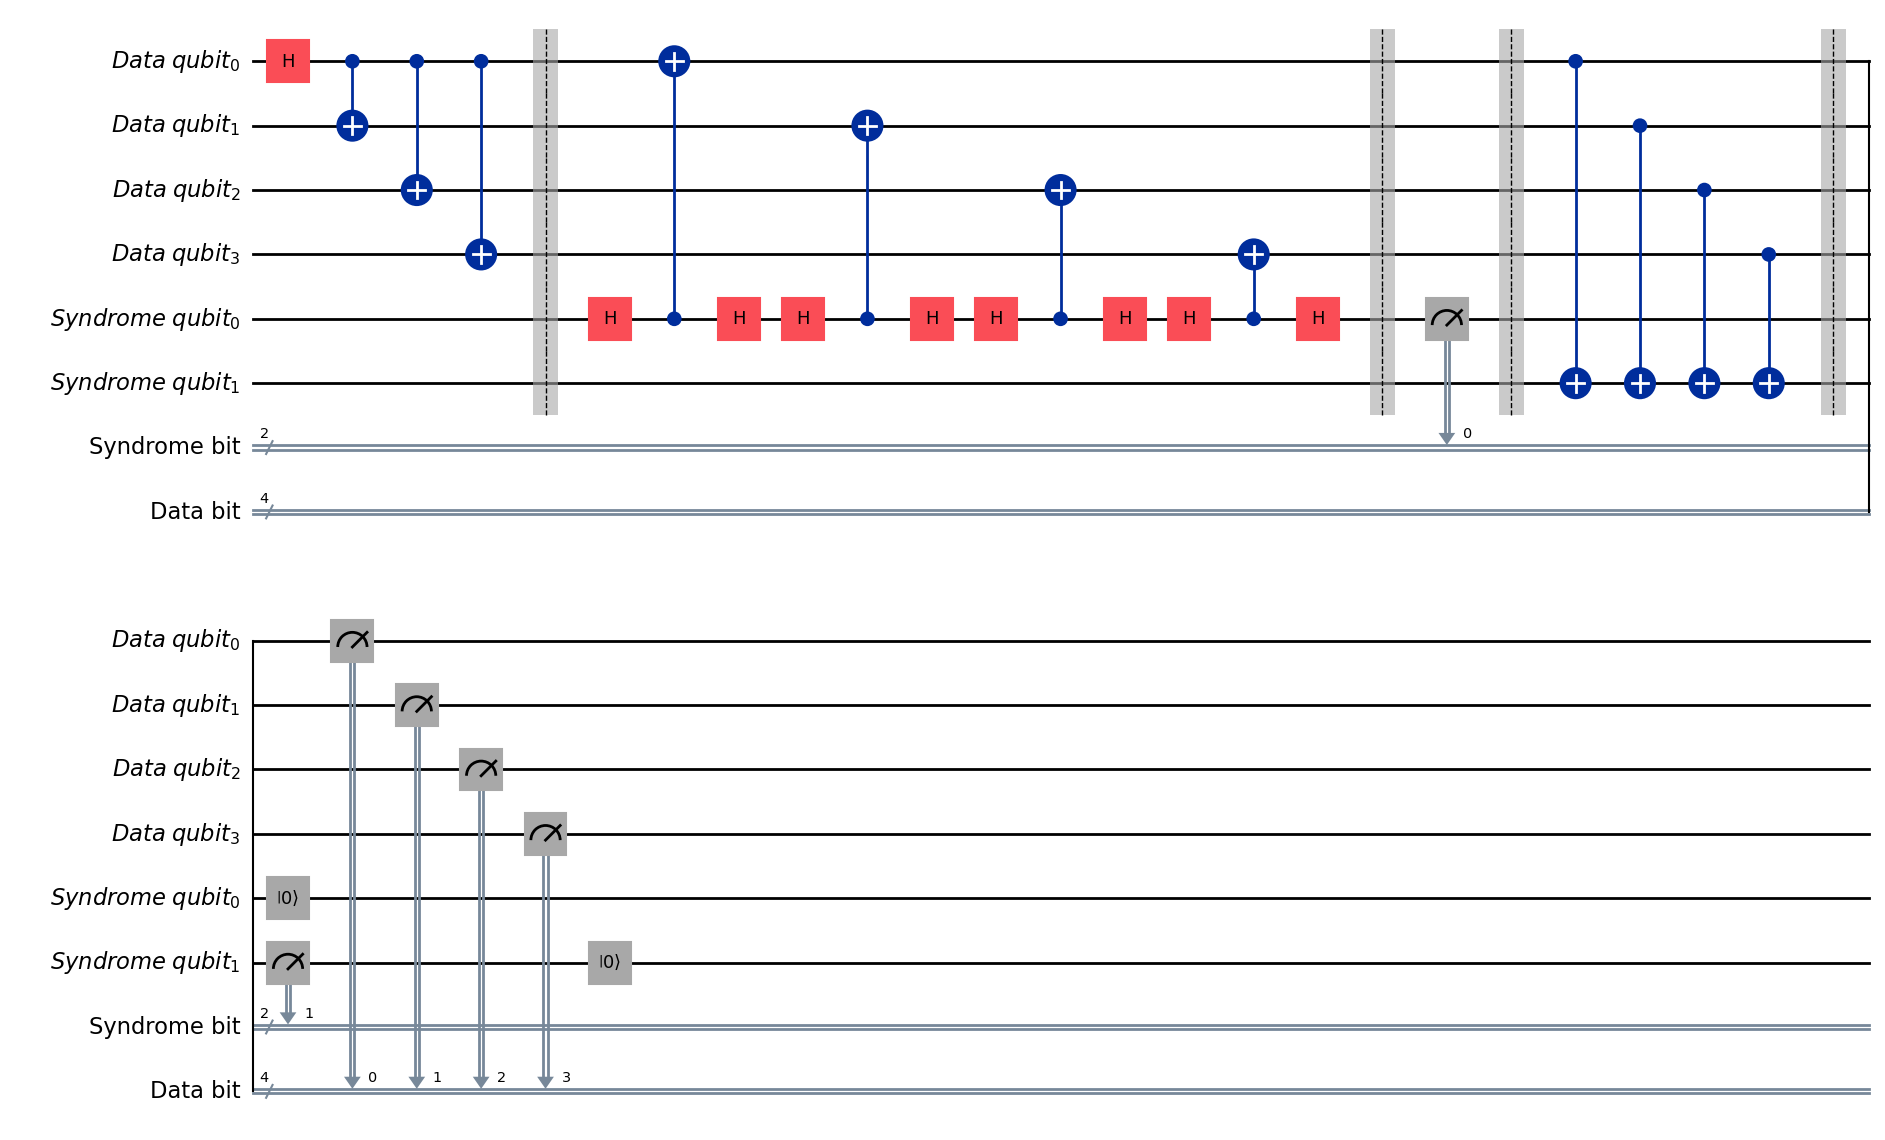

In [11]:
four._circuit.draw("mpl")